In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

serverful_directory_path = '../Serverful/results/'

# For each directory in serverful_directory_path, read the results.csv file and append the results to a dataframe
results = []
length = len('==>[2024-04-06]17:17:18.350')

for directory in os.listdir(serverful_directory_path):
    if os.path.isdir(serverful_directory_path + directory):
        temp_df = pd.read_csv(serverful_directory_path + directory + '/result.csv')
        temp_df['test_id'] = directory[:-length]
        # Move the index column to the front
        cols = temp_df.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        temp_df = temp_df[cols]
        results.append(temp_df)

serverful_df = pd.concat(results, axis=0).reset_index(drop=True)
serverful_df = serverful_df.sort_values(by=['test_id', 'current_trip_loops_index']).reset_index(drop=True)

serverless_directory_path = '../Serverless/log/'

# For each directory in serverful_directory_path, read the results.csv file and append the results to a dataframe
results_2 = []
length = len('_lambda_test_log_2024-04-06_17-18-23.csv')

for file in os.listdir(serverless_directory_path):
    if file.endswith('.csv'):
        temp_df = pd.read_csv(serverless_directory_path + file)
        temp_df['test_id'] = file[:-length]
        # Move the index column to the front
        cols = temp_df.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        temp_df = temp_df[cols]
        results_2.append(temp_df)

serverless_df = pd.concat(results_2, axis=0).reset_index(drop=True)
serverless_df = serverless_df.sort_values(by=['test_id', 'current_trip_loops_index']).reset_index(drop=True)

In [2]:
serverless_df

,test_id,dimension,iterations,trip_Loops,sleep_Duration,current_trip_loops_index,execution_time,network_delay,total_time_spent,Init_duration
0,"NewS12_30,20,100,0",30,20,100,0,1,0.053712,0.589096,35.590551,0.08219
1,"NewS12_30,20,100,0",30,20,100,0,2,0.054100,0.214884,35.590551,NaN
2,"NewS12_30,20,100,0",30,20,100,0,3,0.053680,0.249208,35.590551,NaN
3,"NewS12_30,20,100,0",30,20,100,0,4,0.053584,0.230358,35.590551,NaN
4,"NewS12_30,20,100,0",30,20,100,0,5,0.053716,0.230107,35.590551,NaN
...,...,...,...,...,...,...,...,...,...,...
557,"S18_100,50,50,0",100,50,50,0,46,4.730789,0.337971,253.936807,NaN
558,"S18_100,50,50,0",100,50,50,0,47,4.709199,0.263231,253.936807,NaN
559,"S18_100,50,50,0",100,50,50,0,48,4.720219,0.348292,253.936807,NaN
560,"S18_100,50,50,0",100,50,50,0,49,4.723785,0.239483,253.936807,NaN


In [12]:
serverful_df

,test_id,dimensions,iterations,trip_Loops,sleep_Duration,current_trip_loops_index,execution_time,network_delay,total_time_spent
0,"100,1,1,0",100,1,1,0,1,0.225400,0.572600,0.842
1,"100,50,10,0",100,50,10,0,1,11.332022,0.237978,116.399
2,"100,50,10,0",100,50,10,0,2,11.423431,0.229569,116.399
3,"100,50,10,0",100,50,10,0,3,11.330753,0.263247,116.399
4,"100,50,10,0",100,50,10,0,4,11.381351,0.239649,116.399
...,...,...,...,...,...,...,...,...,...
557,"90,70,5,5",90,70,5,5,1,11.543348,0.328652,79.558
558,"90,70,5,5",90,70,5,5,2,11.565470,0.249530,79.558
559,"90,70,5,5",90,70,5,5,3,11.546410,0.306590,79.558
560,"90,70,5,5",90,70,5,5,4,11.590611,0.268389,79.558


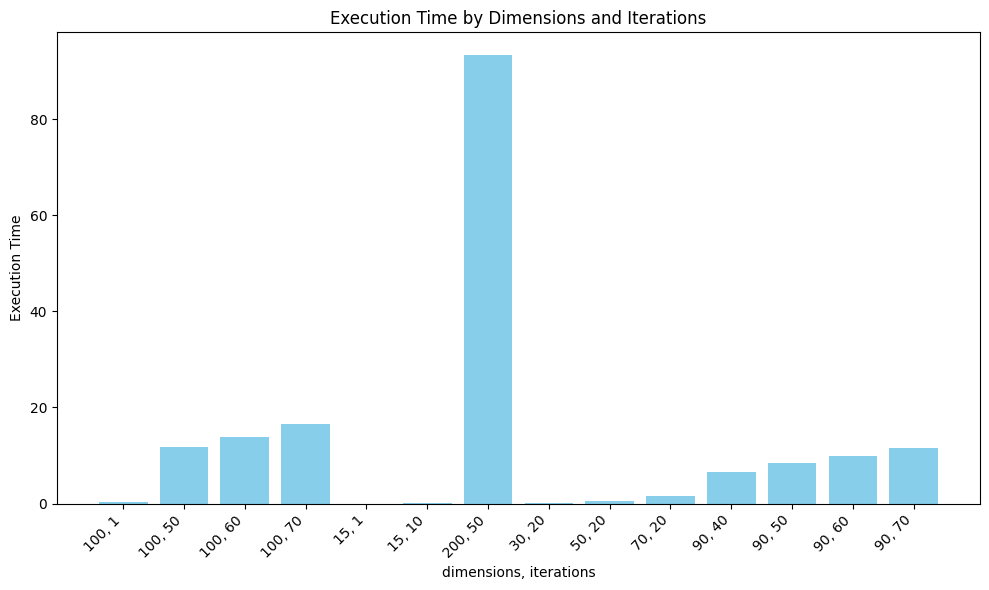

In [14]:
plt.figure(figsize=(10, 6))
x_labels = [f'{dim}, {iter}' for dim, iter in zip(serverful_df['dimensions'], serverful_df['iterations'])]
plt.bar(x_labels, serverful_df['execution_time'], color='skyblue')
plt.xlabel('dimensions, iterations')
plt.ylabel('Execution Time')
plt.title('Execution Time by Dimensions and Iterations')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [7]:
serverful_network_delay_avg = serverful_df['network_delay'].mean()
print(f"serverful_network_delay_avg: {serverful_network_delay_avg}")

serverful_network_delay_avg: 0.2785720693950178


In [8]:
serverless_network_delay_avg = serverless_df['network_delay'].mean()
print(f"serverless_network_delay_avg: {serverless_network_delay_avg}")

serverless_network_delay_avg: 0.8176601315658363


In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

degree = 5
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('linear_regression', LinearRegression())
])

input_X = serverful_df[['dimensions', 'iterations']]
output_y = serverful_df['execution_time']
X_train, X_test, y_train, y_test = train_test_split(input_X, output_y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

features = serverful_df[['dimensions', 'iterations']]
predictions = pipeline.predict(features)
serverful_df['execution_time_prediction'] = predictions

serverful_df

,test_id,dimensions,iterations,trip_Loops,sleep_Duration,current_trip_loops_index,execution_time,network_delay,total_time_spent,execution_time_prediction
0,"100,1,1,0",100,1,1,0,1,0.225400,0.572600,0.842,0.225400
1,"100,50,10,0",100,50,10,0,1,11.332022,0.237978,116.399,11.366902
2,"100,50,10,0",100,50,10,0,2,11.423431,0.229569,116.399,11.366902
3,"100,50,10,0",100,50,10,0,3,11.330753,0.263247,116.399,11.366902
4,"100,50,10,0",100,50,10,0,4,11.381351,0.239649,116.399,11.366902
...,...,...,...,...,...,...,...,...,...,...
557,"90,70,5,5",90,70,5,5,1,11.543348,0.328652,79.558,11.581145
558,"90,70,5,5",90,70,5,5,2,11.565470,0.249530,79.558,11.581145
559,"90,70,5,5",90,70,5,5,3,11.546410,0.306590,79.558,11.581145
560,"90,70,5,5",90,70,5,5,4,11.590611,0.268389,79.558,11.581145


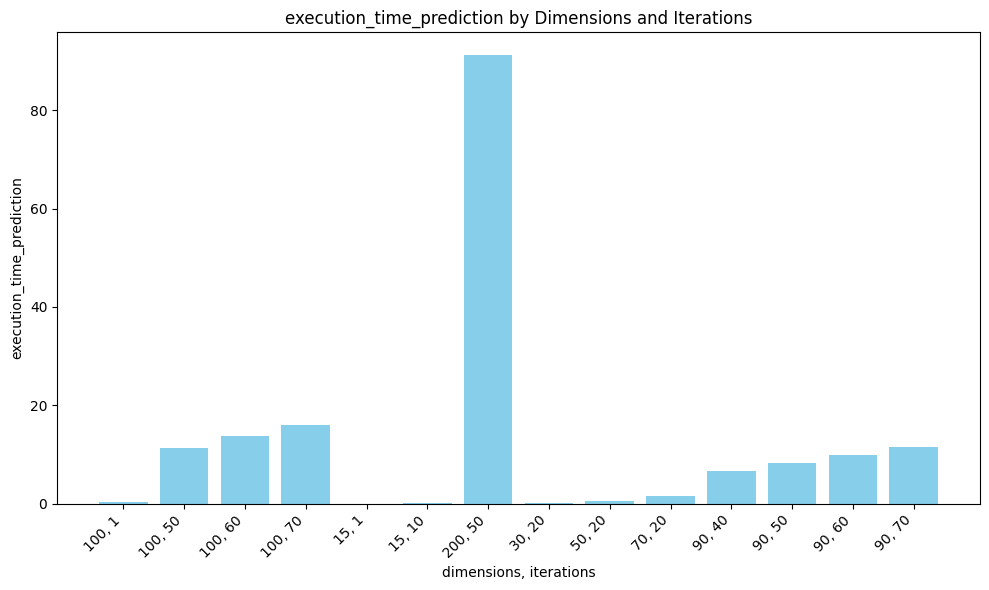

In [51]:
plt.figure(figsize=(10, 6))
x_labels = [f'{dim}, {iter}' for dim, iter in zip(serverful_df['dimensions'], serverful_df['iterations'])]
plt.bar(x_labels, serverful_df['execution_time_prediction'], color='skyblue')
plt.xlabel('dimensions, iterations')
plt.ylabel('execution_time_prediction')
plt.title('execution_time_prediction by Dimensions and Iterations')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [50]:
import numpy as np

def predict_server_total_time_spent(dimensions, iterations, trip_Loops, sleep_Duration):
    input_features = np.array([[dimensions, iterations]])
    execution_time_prediction = pipeline.predict(input_features)[0]
    total_time_spent = (execution_time_prediction + serverful_network_delay_avg) * trip_Loops + (trip_Loops - 1) * sleep_Duration
    return total_time_spent

test_total_time_spent = predict_server_total_time_spent(110, 70, 5, 0)

print(f'test_total_time_spent: {test_total_time_spent}')
    

test_total_time_spent: 108.37185900745183


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
